In [ ]:
#assignment-6 logistic regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [ ]:
bank= pd.read_csv('/content/bank-full.csv',sep=';')

In [ ]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank['y'] = le.fit_transform(bank['y'])

In [ ]:
# Dividing our data into input and output variables 
X=bank.iloc[:,[0,5,9,11,12,13,14]]
Y=bank.iloc[:,-1]
LR=LogisticRegression()
LR.fit(X,Y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred=LR.predict_proba(X)

In [ ]:
pred_df=pd.DataFrame({'actual':Y,
                      'predicted_prob':LR.predict(X)})

In [ ]:
pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [ ]:
YY=LR.predict(X)
YY

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
bank['Prediction']=YY
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Prediction
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0,0


In [ ]:
CM=confusion_matrix(Y,YY)
CM

array([[39306,   616],
       [ 4464,   825]])

In [ ]:
accuracy=((39294+829)/(39294+628+4460+829))*100
accuracy

88.74610161243946

In [ ]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,YY))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.57      0.59     45211
weighted avg       0.86      0.89      0.86     45211



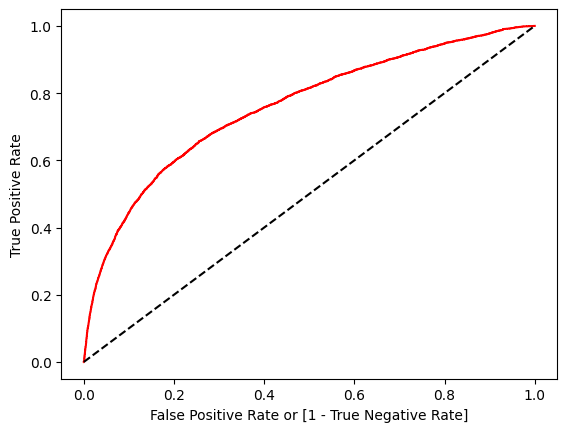

auc accuracy: 0.5702770146539012


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, LR.predict_proba (X)[:,1])

auc = roc_auc_score(Y, YY)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()
print('auc accuracy:',auc)

In [ ]:
#TRAIN-TEST SPLIT

In [ ]:
array=bank.values

In [ ]:
X=array[:,[0,5,9,11,12,13,14]]
Y=array[:,-1]
Y=Y.astype('int')

In [ ]:
Y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,shuffle=True)

In [ ]:
model=LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
op_train=model.score(X_train,Y_train)
op_train

0.9974563149745631

In [ ]:
op_test=model.score(X_test,Y_test)
op_test

0.9974565962623023

In [ ]:
pred=model.predict_proba(X_test)

In [ ]:
pred

array([[1.00000000e+00, 2.46224818e-10],
       [1.00000000e+00, 1.98698205e-21],
       [1.00000000e+00, 2.25321909e-25],
       ...,
       [1.00000000e+00, 7.30778930e-11],
       [1.00000000e+00, 9.97806834e-21],
       [1.00000000e+00, 4.49985263e-17]])

In [ ]:
preds=model.predict(X_test)

In [ ]:
preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
CMX=confusion_matrix(Y_test,preds)
CMX

array([[8760,   13],
       [  10,  260]])

In [ ]:
accuracy=((7833+176)/(7833+151+883+176))*100
accuracy

88.56574145748093

In [ ]:
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8773
           1       0.95      0.96      0.96       270

    accuracy                           1.00      9043
   macro avg       0.98      0.98      0.98      9043
weighted avg       1.00      1.00      1.00      9043



Text(0, 0.5, 'True Positive Rate')

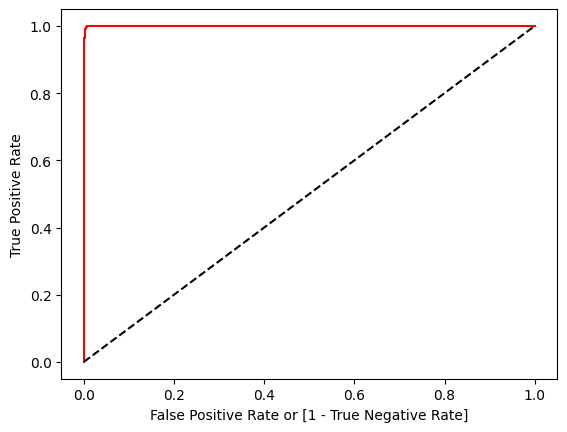

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, model.predict_proba (X)[:,1])

auc = roc_auc_score(Y_test,preds)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [ ]:
auc

0.9807405718724538